In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import chirp

In [2]:
#cylinder params
cyl_rad = 0.05
U_upper = 1
U_lower = -1
t_initial = (0,4) #inital phase to consider transience
t_final = 12 # data considered for dmd -> (t_initial[1], t_final)
U_act_initial = 0 # actuation in the transient period

In [3]:
def write_omega_csv(t, omega_act, path="omega.csv"):
    t = np.asarray(t, dtype=float).ravel()
    omega = np.asarray(omega_act, dtype=float).ravel()
    data = np.column_stack([t, omega])
    # Write with one header line and no leading '#' (comments='')
    np.savetxt(
        path, data,
        delimiter=",",
        header="time,omega",
        comments="",
        fmt="%.10g"
    )


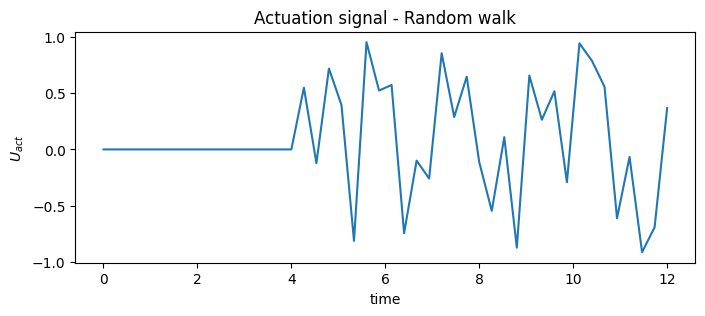

In [6]:
#random walk

rng = np.random.default_rng(seed=42)   # set a seed for reproducibility
num = 30
U_act = rng.uniform(U_lower, U_upper, size=num)             # shape (10,)
t = np.linspace(t_initial[1], t_final, num+1, endpoint=True)
t = np.insert(t, 0, t_initial[0])
U_act = np.insert(U_act, 0, U_act_initial)
U_act = np.insert(U_act, 0, U_act_initial)
plt.figure(figsize=(8, 3))
plt.plot(t, U_act)
plt.xlabel("time")
plt.ylabel(r"$U_{act}$")
plt.title("Actuation signal - Random walk")
plt.show()

# write the angular velocity omega actuation signal into csv
omega_act = U_act/cyl_rad
write_omega_csv(t, omega_act, "omega.csv")

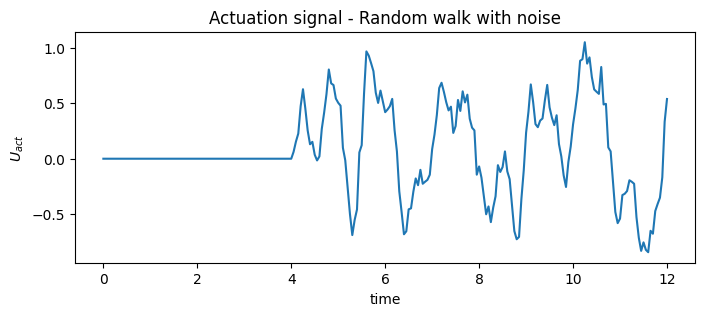

In [8]:
#random walk with noise

rng = np.random.default_rng(seed=42)   # set a seed for reproducibility
num = 30
noise_pc = 0.05
noise_dt = 0.05
U_act = rng.uniform(U_lower, U_upper, size=num)              # shape (10,)
t = np.linspace(t_initial[1], t_final, num+1, endpoint=True)
t = np.insert(t, 0, t_initial[0])
U_act = np.insert(U_act, 0, U_act_initial)
U_act = np.insert(U_act, 0, U_act_initial)
f = interp1d(t, U_act)
tn = np.arange(t_initial[1], t_final+1e-12, noise_dt)
U_base = f(tn)
sigma = 0.05*(U_upper-U_lower)
noise = rng.normal(loc=0.0, scale=sigma, size=tn.shape)
noise[0] = 0
U_noisy = U_base + noise
U_noisy = np.insert(U_noisy, 0, U_act_initial)
tn = np.insert(tn, 0, t_initial[0])
plt.figure(figsize=(8, 3))
plt.plot(tn, U_noisy)
plt.xlabel("time")
plt.ylabel(r"$U_{act}$")
plt.title("Actuation signal - Random walk with noise")
plt.show()

# write the angular velocity omega actuation signal into csv
omega_act = U_noisy/cyl_rad
write_omega_csv(tn, omega_act, "omega.csv")

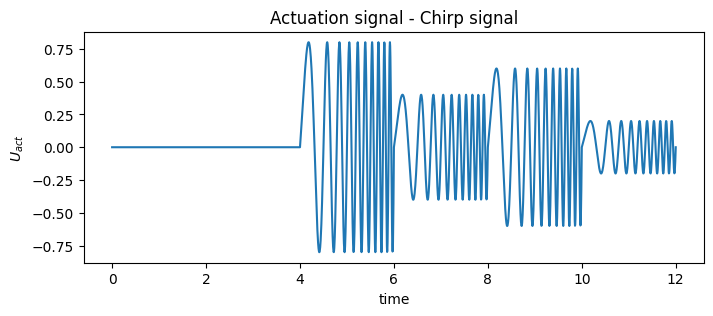

In [11]:
#chirp signal

rng = np.random.default_rng(seed=42)   # set a seed for reproducibility
noise_dt = 0.005
a = [0.8, 0.4, 0.6, 0.2]
t = np.arange(0, 2.0, noise_dt)
chirp = U_upper*np.sin((1.0+2*t)*t*2*np.pi) + U_act_initial
U = list()
t_fi = list()
for i in range(len(a)):
    
    U.append(a[i]*chirp)
    if i == 0:
        t = t+4
    else:
        t = t+2
    t_fi.append(t)    
U_act = np.array(U)
t_fi = np.array(t_fi)
U_act = np.insert(U_act, 0, U_act_initial)
U_act = np.insert(U_act, len(U_act), U_act_initial)
t_fi = np.insert(t_fi, 0, t_initial[0])
t_fi = np.insert(t_fi, len(t_fi), t_final)

plt.figure(figsize=(8, 3))
plt.plot(t_fi, U_act)
plt.xlabel("time")
plt.ylabel(r"$U_{act}$")
plt.title("Actuation signal - Chirp signal")
plt.show()

# write the angular velocity omega actuation signal into csv
omega_act = U_act/cyl_rad
write_omega_csv(t_fi, omega_act, "omega.csv")

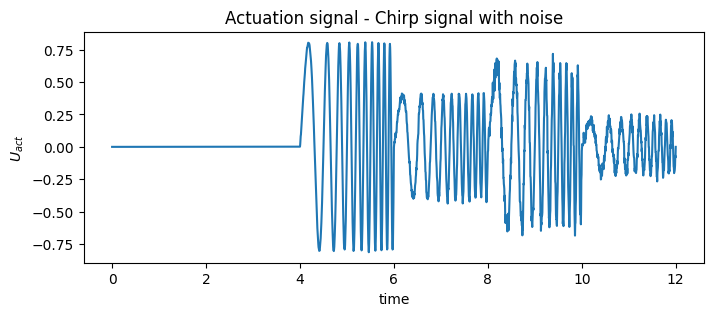

In [12]:
#chirp signal with noise

rng = np.random.default_rng(seed=42)   # set a seed for reproducibility
noise_dt = 0.005
a = [0.8, 0.4, 0.6, 0.2]
b = [0.05, 0.09, 0.15, 0.11]
t = np.arange(0, 2.0, noise_dt)
chirp = U_upper*np.sin((1.0+2*t)*t*2*np.pi) + U_act_initial
U = list()
t_fi = list()
for i in range(len(a)):
    
    sigma = b[i]*(U_upper-U_lower)
    noise = rng.normal(loc=0.0, scale=sigma, size=t.shape)
    U.append(a[i]*chirp + b[i]*noise)
    if i == 0:
        t = t+4
    else:
        t = t+2
    t_fi.append(t)    
U_act = np.array(U)
U_act = np.insert(U_act, 0, U_act_initial)
U_act = np.insert(U_act, len(U_act), U_act_initial)

t_fi = np.array(t_fi)
t_fi = np.insert(t_fi, 0, t_initial[0])
t_fi = np.insert(t_fi, len(t_fi), t_final)

plt.figure(figsize=(8, 3))
plt.plot(t_fi, U_act)
plt.xlabel("time")
plt.ylabel(r"$U_{act}$")
plt.title("Actuation signal - Chirp signal with noise")
plt.show()

# write the angular velocity omega actuation signal into csv
omega_act = U_act/cyl_rad
write_omega_csv(t_fi, omega_act, "omega.csv")

-0.0012131821147963286


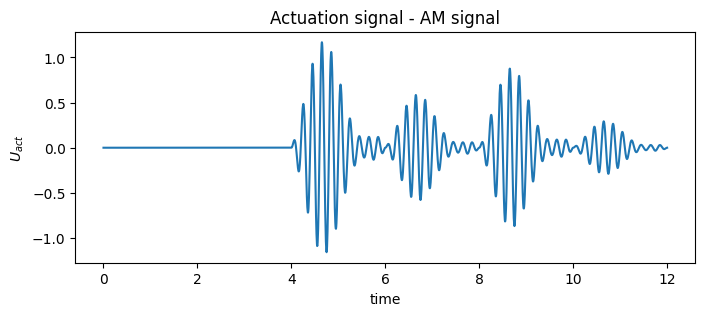

In [15]:
rng = np.random.default_rng(seed=42)   # set a seed for reproducibility
noise_dt = 0.005
a = [0.8, 0.4, 0.6, 0.2]
t = np.arange(0, 2.0, noise_dt)
fc = 5     # carrier frequency (Hz)
fm = 0.5      # modulation frequency (Hz)
Am = 0.8    # modulation depth

# envelope to force zeros at t=0 and t=2
window = np.sin(np.pi * t / 2)

# AM signal with enforced zeros
carrier = np.sin(2 * np.pi * fc * t)
modulator = np.sin(2 * np.pi * fm * t)
chirp = window * (1 + Am * modulator) * carrier
print(chirp[-1])
U = list()
t_fi = list()
for i in range(len(a)):
    
    U.append(a[i]*chirp)
    if i == 0:
        t = t+4
    else:
        t = t+2
    t_fi.append(t)    
U_act = np.array(U)
t_fi = np.array(t_fi)
U_act = np.insert(U_act, 0, U_act_initial)
U_act = np.insert(U_act, len(U_act), U_act_initial)
t_fi = np.insert(t_fi, 0, t_initial[0])
t_fi = np.insert(t_fi, len(t_fi), t_final)

plt.figure(figsize=(8, 3))
plt.plot(t_fi, U_act)
plt.xlabel("time")
plt.ylabel(r"$U_{act}$")
plt.title("Actuation signal - AM signal")
plt.show()

# write the angular velocity omega actuation signal into csv
omega_act = U_act/cyl_rad
write_omega_csv(t_fi, omega_act, "omega.csv")